In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Modèle de ML
from sklearn import linear_model

# data pre-processing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Outils score et evaluation de modèle
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score

# Outils optmisation de modèle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv("Result_final.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743257 entries, 0 to 1743256
Data columns (total 25 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Unnamed: 0                         int64 
 1   MandatId                           int64 
 2   DateCreation                       object
 3   BienMandatId                       int64 
 4   Statut                             int64 
 5   DescriptionBien_DateOffreAcceptee  object
 6   Origine_DateCollecte               object
 7   CritereId                          int64 
 8   BudgetMaxEuro                      int64 
 9   SurfaceMin                         int64 
 10  NombrePiecesEnum                   int64 
 11  NombreChambresEnum                 int64 
 12  Departement_LocalisationId         int64 
 13  Region_LocalisationId              int64 
 14  LocalisationId                     int64 
 15  StatutMandat                       int64 
 16  TypeMission                        i

In [4]:
df.head()

,Unnamed: 0,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,BudgetMaxEuro,SurfaceMin,...,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro.1,CodePostal,Ville,Departement,Region,Succes
0,0,9049,2015-03-30,24579,1,0001-01-01,0001-01-01,9051,250000,30,...,9,2,2,Investissement,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
1,1,9049,2015-03-30,24580,0,0001-01-01,0001-01-01,9051,250000,30,...,9,2,2,Investissement,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
2,2,9049,2015-03-30,24582,1,0001-01-01,0001-01-01,9051,250000,30,...,9,2,2,Investissement,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
3,3,9049,2015-03-30,24583,0,0001-01-01,0001-01-01,9051,250000,30,...,9,2,2,Investissement,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
4,4,9049,2015-03-30,24584,7,0001-01-01,0001-01-01,9051,250000,30,...,9,2,2,Investissement,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0


In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
df.TypeProjet.value_counts()

Résidence principale    1319221
Investissement           323967
Résidence secondaire      98400
0                          1669
Name: TypeProjet, dtype: int64

In [7]:
df['TypeProjet'].replace("0","NULL",inplace=True)

In [8]:
df.TypeProjet.value_counts()

Résidence principale    1319221
Investissement           323967
Résidence secondaire      98400
NULL                       1669
Name: TypeProjet, dtype: int64

In [9]:
df['TypeProjet'].replace("NULL","Résidence principale",inplace=True)

In [10]:
df.TypeProjet.value_counts()

Résidence principale    1320890
Investissement           323967
Résidence secondaire      98400
Name: TypeProjet, dtype: int64

In [11]:
df["TypeProjet"].replace('Investissement',0,inplace=True)
df["TypeProjet"].replace('Résidence principale',1,inplace=True)
df["TypeProjet"].replace('Résidence secondaire',2,inplace=True)

In [12]:
df.TypeProjet.value_counts()

1    1320890
0     323967
2      98400
Name: TypeProjet, dtype: int64

<AxesSubplot:>

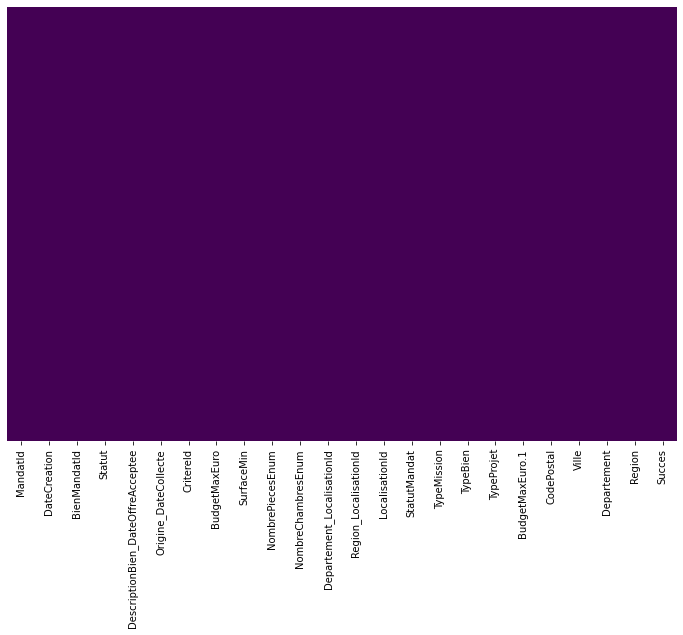

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull() , 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

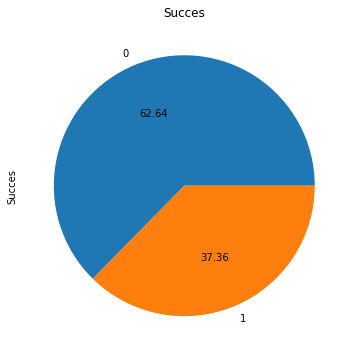

In [14]:
plot = df['Succes'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Succes')

In [15]:
df.shape

(1743257, 24)

In [16]:
df["Succes"].value_counts()

0    1091942
1     651315
Name: Succes, dtype: int64

## Diviser le jeu de données en 2 : 25% 75%

In [17]:
# obtenir 25% des données

25*1743257/100

435814.25

In [18]:
df_25 = df.iloc[:435816,:]

In [19]:
df_25.shape

(435816, 24)

In [20]:
df_75 = df.iloc[435816:,:]

In [21]:
df_75.shape

(1307441, 24)

In [22]:
df_75.tail()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,BudgetMaxEuro,SurfaceMin,NombrePiecesEnum,...,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro.1,CodePostal,Ville,Departement,Region,Succes
1743252,86816,2021-11-06,464180,0,0001-01-01,2021-12-20,87635,390000,90,3,...,7,2,1,1,390000,6530,Saint-Cézaire-sur-Siagne,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,1
1743253,86816,2021-11-06,464329,0,0001-01-01,2021-12-21,87635,390000,90,3,...,7,2,1,1,390000,6530,Saint-Cézaire-sur-Siagne,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,1
1743254,86816,2021-11-06,464663,0,0001-01-01,2021-12-27,87635,390000,90,3,...,7,2,1,1,390000,6530,Saint-Cézaire-sur-Siagne,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,1
1743255,86816,2021-11-06,464914,0,0001-01-01,2022-01-02,87635,390000,90,3,...,7,2,1,1,390000,6530,Saint-Cézaire-sur-Siagne,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,1
1743256,86816,2021-11-06,465767,0,0001-01-01,2022-01-04,87635,390000,90,3,...,7,2,1,1,390000,6530,Saint-Cézaire-sur-Siagne,Alpes-Maritimes,Provence-Alpes-Côte d'Azur,1


In [23]:
df_25.tail()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,BudgetMaxEuro,SurfaceMin,NombrePiecesEnum,...,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro.1,CodePostal,Ville,Departement,Region,Succes
435811,44429,2018-06-25,138614,7,0001-01-01,0001-01-01,44508,180000,45,3,...,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435812,44429,2018-06-25,138615,0,0001-01-01,2018-07-01,44508,180000,45,3,...,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435813,44429,2018-06-25,138616,7,0001-01-01,0001-01-01,44508,180000,45,3,...,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435814,44429,2018-06-25,138617,0,0001-01-01,2018-06-29,44508,180000,45,3,...,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1
435815,44429,2018-06-25,138618,7,0001-01-01,0001-01-01,44508,180000,45,3,...,8,2,2,1,180000,34970,Lattes,Hérault,Languedoc-Roussillon,1


In [24]:
df_25["Succes"].value_counts()

0    317536
1    118280
Name: Succes, dtype: int64

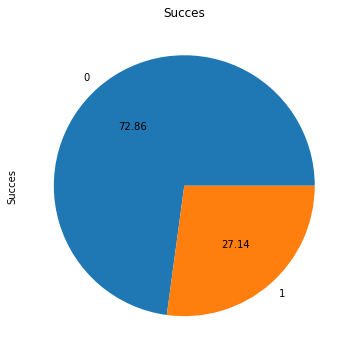

In [25]:
plot = df_25['Succes'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Succes')

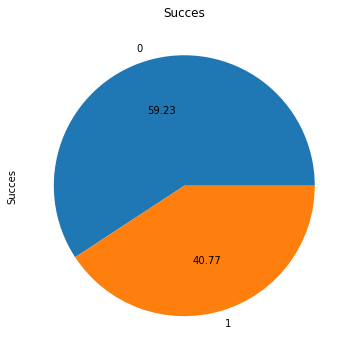

In [26]:
plot = df_75['Succes'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Succes')

# Machine Learning

### test en echantillonant le df_75 en 40% des datat, random_state 60 echantillons aleatoire 

In [27]:
df_test = df_75.sample(frac = 0.4, random_state = 60)

In [28]:
df_test.shape

(522976, 24)

In [29]:
df_test["Succes"].value_counts()

0    310071
1    212905
Name: Succes, dtype: int64

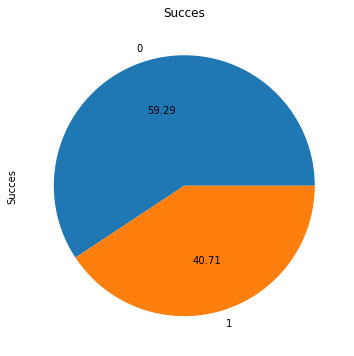

In [30]:
plot = df_test['Succes'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Succes')

In [31]:
#df_sup_0 = df_25[df_25["Succes"] == 0]

In [32]:
#df_sup_0.head()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,BudgetMaxEuro,SurfaceMin,NombrePiecesEnum,...,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro.1,CodePostal,Ville,Departement,Region,Succes
0,9049,2015-03-30,24579,1,0001-01-01,0001-01-01,9051,250000,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
1,9049,2015-03-30,24580,0,0001-01-01,0001-01-01,9051,250000,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
2,9049,2015-03-30,24582,1,0001-01-01,0001-01-01,9051,250000,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
3,9049,2015-03-30,24583,0,0001-01-01,0001-01-01,9051,250000,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0
4,9049,2015-03-30,24584,7,0001-01-01,0001-01-01,9051,250000,30,2,...,9,2,2,0,250000,1000,Bourg En Bresse,Ain,Rhône-Alpes,0


In [33]:
#df_sup_0.shape

(317536, 24)

In [36]:
df_test.head()

,MandatId,DateCreation,BienMandatId,Statut,DescriptionBien_DateOffreAcceptee,Origine_DateCollecte,CritereId,BudgetMaxEuro,SurfaceMin,NombrePiecesEnum,...,StatutMandat,TypeMission,TypeBien,TypeProjet,BudgetMaxEuro.1,CodePostal,Ville,Departement,Region,Succes
550018,2133,2013-04-09,2343,0,0001-01-01,0001-01-01,2133,350000,100,4,...,9,1,1,1,350000,59000,Lille,Nord,Nord-Pas-de-Calais,0
1024508,79076,2021-02-19,386476,0,0001-01-01,2021-02-22,79879,1500000,100,6,...,9,2,2,0,1500000,75003,Paris 3Eme Arrondissement,Paris,Île-de-France,0
612609,5556,2014-05-17,24238,0,0001-01-01,2015-03-25,5556,350000,90,4,...,9,1,2,1,350000,69002,Lyon 2Eme Arrondissement,Rhône,Rhône-Alpes,0
1252948,49161,2018-12-09,166680,0,0001-01-01,2018-12-14,49320,260000,24,2,...,9,2,2,1,260000,75015,Paris 15Eme Arrondissement,Paris,Île-de-France,0
653968,68244,2020-03-27,348346,0,0001-01-01,2020-10-09,68904,300000,38,2,...,9,2,2,0,300000,69003,Lyon 3Eme Arrondissement,Rhône,Rhône-Alpes,0


In [35]:
df_test.columns

Index(['MandatId', 'DateCreation', 'BienMandatId', 'Statut',
       'DescriptionBien_DateOffreAcceptee', 'Origine_DateCollecte',
       'CritereId', 'BudgetMaxEuro', 'SurfaceMin', 'NombrePiecesEnum',
       'NombreChambresEnum', 'Departement_LocalisationId',
       'Region_LocalisationId', 'LocalisationId', 'StatutMandat',
       'TypeMission', 'TypeBien', 'TypeProjet', 'BudgetMaxEuro.1',
       'CodePostal', 'Ville', 'Departement', 'Region', 'Succes'],
      dtype='object')

In [37]:
df_test.dtypes.value_counts()


int64     18
object     6
dtype: int64

In [38]:
df_test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


DateCreation                         1937
DescriptionBien_DateOffreAcceptee     796
Origine_DateCollecte                 2961
Ville                                1955
Departement                            62
Region                                 21
dtype: int64

# Choix des features

In [39]:
X =df_test[["BudgetMaxEuro", 'SurfaceMin','NombrePiecesEnum',
       'NombreChambresEnum', 
       'TypeMission', 'TypeBien', 'TypeProjet', 'BudgetMaxEuro.1',
       'CodePostal']]

In [40]:
X.shape

(522976, 9)

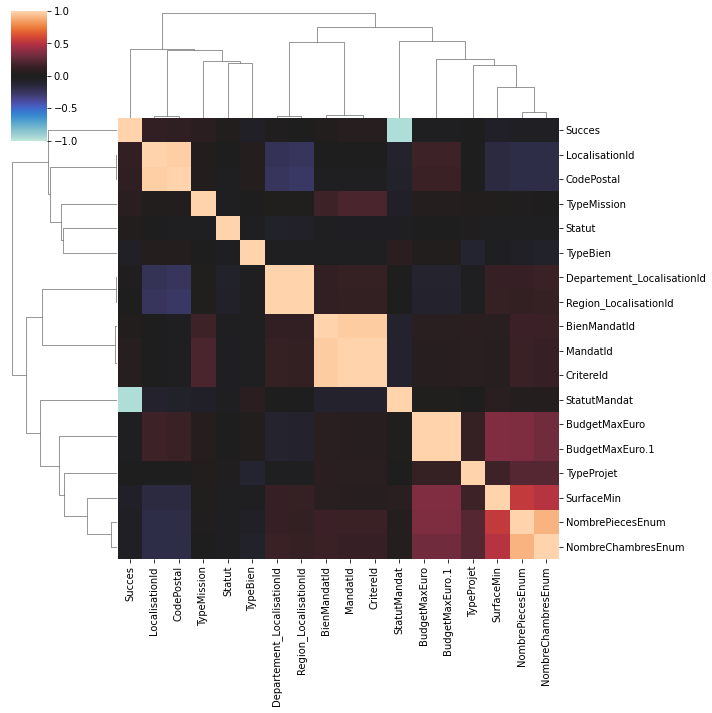

In [41]:
def corrplot(df_test, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(X, annot=None)

In [ ]:
y = df_test['Succes']

In [ ]:
y.shape

# Diviser le jeu de données en jeu d'entrainement et jeu de test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pre-processing

## Normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Encodage?

In [ ]:
#ordinal encoder données X
# pas necessaire dejà encoder 0,1
# one hot encoding
# peut-être sur les region et les departements?

In [ ]:
from sklearn.preprocessing import OneHotEncoder


# Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', C =0.001, penalty = 'l2' )
lr.fit(X_train,y_train)

In [ ]:
y_lr = lr.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve LR')
plt.show()

# knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn, X_train,y_train )
plt.plot([0,1],[0,1])
plt.xlabel('false positive')
plt.ylabel('true positve')
plt.title('ROC curve knn')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from pprint import pprint
pprint("paramètre actuellement utiliés : \n")
pprint(rfc.get_params())
rfc.fit(X_train, y_train)
y_rfc = rfc.predict(X_test)
pred_prob3 = rfc.predict_proba(X_test)

# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic')
from pprint import pprint
pprint("paramètre actuellement utiliés : \n")
pprint(xgb.get_params())
xgb.fit(X_train, y_train,eval_metric = "logloss",verbose=True)
y_xgb = xgb.predict(X_test)
pred_prob4 = xgb.predict_proba(X_test)

# naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from pprint import pprint
pprint("paramètre actuellement utiliés : \n")
pprint(gnb.get_params())
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
y_gnb = gnb.predict(X_test)
pred_prob5 = gnb.predict_proba(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_gnb,target_names = ['échec(Class 0)','succès (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,gnb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
y_gbc = gbc.predict(X_test)
pred_prob6 = gbc.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_gbc,target_names = ['échec(Class 0)','succès (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test,gbc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

# LGBMClassifier

In [ ]:
#!pip install lightgbm

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

In [ ]:
y_clf = clf.predict(X_test)
pred_prob7 = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf,target_names = ['échec(Class 0)','succès (Class 1)']))

# CatBoostClassifier

In [ ]:
#!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=2,
                           learning_rate=1,
                           depth=2)
cat_features = [0, 1]
# Fit model
model.fit(X_train, y_train)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class
pred_prob8 = model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_class,target_names = ['échec(Class 0)','succès (Class 1)']))

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])
auc_score8 = roc_auc_score(y_test, pred_prob8[:,1])


print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6, auc_score7, auc_score8)

In [ ]:

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle = '--', color = 'purple', label = "RandomForest Classifier")
plt.plot(fpr4, tpr4, linestyle = '--', color = 'yellow', label = "XgBoost")
plt.plot(fpr5, tpr5, linestyle = '--', color = 'red', label = "Naive Bayes")
plt.plot(fpr6, tpr6, linestyle = '--', color = 'pink', label = "Gradient Boosting Classifier")
plt.plot(fpr6, tpr6, linestyle = '--', color = 'brown', label = "LGBMClassifier")
plt.plot(fpr6, tpr6, linestyle = '--', color = 'black', label = "CatBoostClassifier")


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.metrics import accuracy_score
print("Correct prediction: ", accuracy_score(y_test, knn.predict(X_test), normalize = False))
print("Total Prediction : ",X.shape[0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lr,target_names = ['Echec(Class 0)','Succès (Class 1)']))
cm = confusion_matrix(y_test,lr.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn, target_names = ['échec(Class 0)','succès (Class 1)']))
cm = confusion_matrix(y_test,knn.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rfc, target_names = ['échec(Class 0)','succès (Class 1)']))
cm = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_xgb, target_names = ['échec(Class 0)','succès (Class 1)']))
cm = confusion_matrix(y_test, xgb.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

# Wisdom of the crown

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier
# hard 
# soft = meilleur quand model bien équilibré


In [ ]:
model_1 = SGDClassifier(random_state = 0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_4 = VotingClassifier([("SGD", model_1),
                            ('Tree', model_2),
                            ("Knn", model_3)],
                           voting = "hard" )

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [ ]:
model = BaggingClassifier(base_estimator = KNeighborsClassifier(),
                         n_estimators = 100)